# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Maria_Margaretha_Sitorus]
- **Email:** [margarethas29@gmail.com]
- **ID Dicoding:** [margarethas29]

## Menentukan Pertanyaan Bisnis

- Produk kategori apa yang paling banyak dan paling sedikit terjual?
- Metode pembayaran apa yang paling diminati?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# URL GitHub yang baru
url_order_items_dataset = "https://raw.githubusercontent.com/margarethas29/Proyek-Dicoding/main/order_items_dataset.csv"

# Load data dari GitHub
order_data = pd.read_csv(url_order_items_dataset)

# URL GitHub yang baru
url_products_dataset = "https://raw.githubusercontent.com/margarethas29/Proyek-Dicoding/main/products_dataset.csv"

# Load data dari GitHub
products_data = pd.read_csv(url_products_dataset)

# URL GitHub yang baru
url_order_payments_dataset = "https://raw.githubusercontent.com/margarethas29/Proyek-Dicoding/main/order_payments_dataset.csv"

# Load data dari GitHub
order_payments_data = pd.read_csv(url_order_payments_dataset)


### Assessing Data

In [ ]:
order_data.head()
order_data.info()
print("Jumlah duplikasi: ", order_data.duplicated().sum())
order_data.describe() #shipping_limit_date type data salah
order_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
products_data.head()
products_data.info()
print("Jumlah duplikasi: ", products_data.duplicated().sum())
products_data.describe()
products_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
order_payments_data.head()
order_payments_data.info()
print("Jumlah duplikasi: ", order_payments_data.duplicated().sum())
order_payments_data.describe()
order_payments_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Cleaning Data

In [ ]:
order_data.dropna(axis=0, inplace=True)
order_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_data[column] = pd.to_datetime(order_data[column])
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
products_data.dropna(axis=0, inplace=True)
products_data.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
order_data.describe(include="all")

<ipython-input-37-789816bc4395>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_data.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [ ]:
products_data.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
order_payments_data.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
fixproduct_df = pd.merge(
    left=order_data,
    right=products_data,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
fixproduct_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
fixproduct_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="order_item_id", ascending=False)

,product_id,order_item_id,price
product_category_name,,,
cama_mesa_banho,3029,13665,1036988.68
moveis_decoracao,2657,11540,729762.49
beleza_saude,2444,11081,1258681.34
esporte_lazer,2867,9932,988048.97
informatica_acessorios,1639,9874,911954.32
...,...,...,...
portateis_cozinha_e_preparadores_de_alimentos,10,16,3968.53
la_cuisine,10,16,2054.99
pc_gamer,3,11,1545.95


In [ ]:
order_payments_data.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
}).sort_values(by="payment_type", ascending=True)

order_id payment_value                               
              nunique           max    min        mean         std
payment_type                                                      
boleto          19784       7274.88  11.62  145.034435  213.581061
credit_card     76505      13664.08   0.01  163.319021  222.119311
debit_card       1528       4445.50  13.38  142.570170  245.793401
not_defined         3          0.00   0.00    0.000000    0.000000
voucher          3866       3184.34   0.00   65.703354  115.519185

## Visualization & Explanatory Analysis

In [ ]:
sum_order_items_df = fixproduct_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,order_item_id
0,cama_mesa_banho,13665
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874
5,utilidades_domesticas,9051
6,relogios_presentes,6594
7,ferramentas_jardim,5874
8,telefonia,5161
9,automotivo,4881


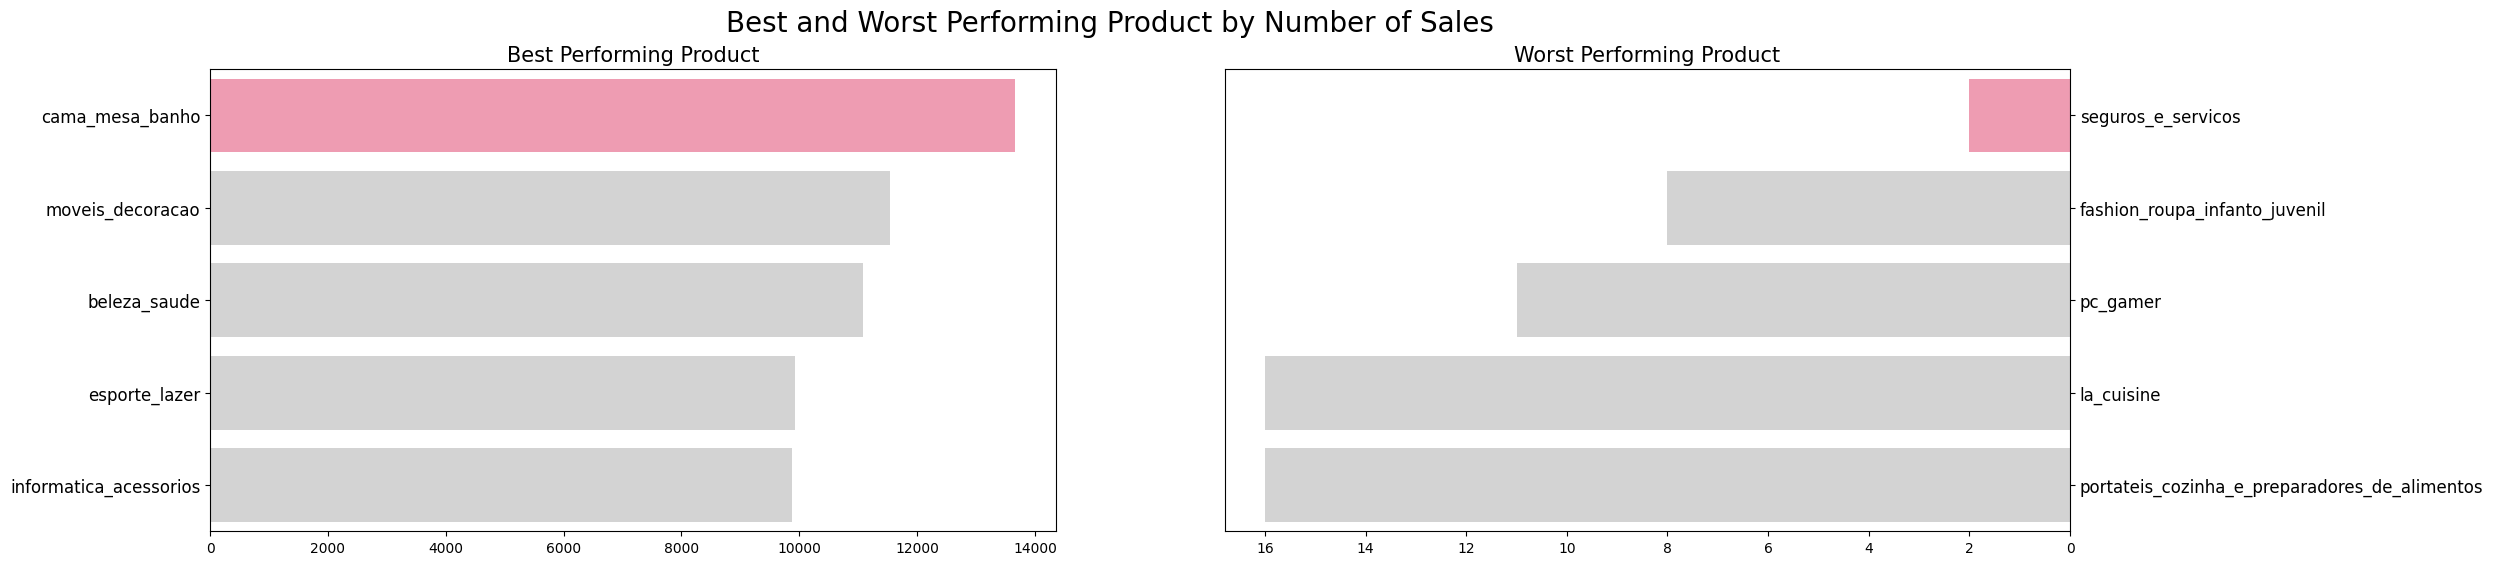

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FC8EAC", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

In [ ]:
data = {'Jenis Pembayaran' : ['Boleto', 'Credit Card', 'Debit Card', 'Not Defined', 'Voucher'], 'Unit Terjual' : [19784, 76505, 1528, 3, 3866], 'Rata-Rata Penjualan (Nominal)' : [145.034435, 163.319021, 142.570170, 0.000000, 65.703354]}
paymentfix_df=pd.DataFrame(data)

print(paymentfix_df)

  Jenis Pembayaran  Unit Terjual  Rata-Rata Penjualan (Nominal)
0           Boleto         19784                     145.034435
1      Credit Card         76505                     163.319021
2       Debit Card          1528                     142.570170
3      Not Defined             3                       0.000000
4          Voucher          3866                      65.703354


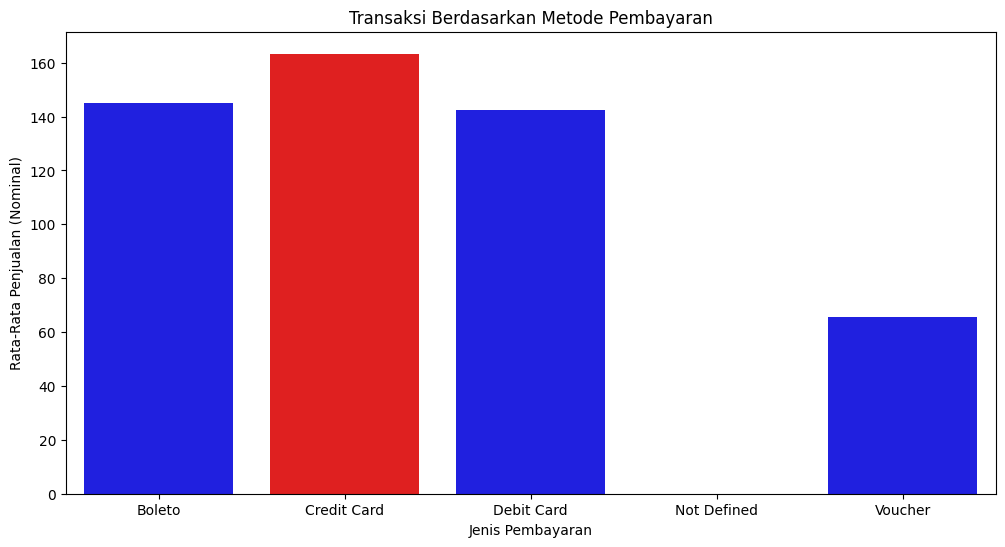

In [ ]:
# Hitung rata-rata penjualan berdasarkan jenis pembayaran
rata_rata = paymentfix_df.groupby('Jenis Pembayaran')['Rata-Rata Penjualan (Nominal)'].mean().reset_index()

# Tentukan warna untuk nilai tertinggi
highest_value_color = 'red'

# Temukan nilai tertinggi
max_value = rata_rata['Rata-Rata Penjualan (Nominal)'].max()

# Buat palet dengan warna khusus untuk nilai tertinggi
palette = [highest_value_color if val == max_value else 'blue' for val in rata_rata['Rata-Rata Penjualan (Nominal)']]

# Visualisasi menggunakan seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Jenis Pembayaran', y='Rata-Rata Penjualan (Nominal)', data=rata_rata, palette=palette, errorbar=None)
plt.title('Transaksi Berdasarkan Metode Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Rata-Rata Penjualan (Nominal)')
plt.show()

## Conclusion

- Kategori produk "cama_mesa_banho" atau dalam bahasa inggris bed, bath, and table merupakan kategori dengan unit penjualan terbanyak sebesar 13665 unit. Sedangkan kategori produk "seguros_e_servicos" atau dalam bahasa inggris security and services merupakan kategori dengan unit penjualan paling sedikit sebanyak 2 unit. Saran dari saya sebaiknya kategori produk terendah diberikan suatu "penawaran khusus" dan pada offline store diletakkan pada tempat yang strategis.

- Transaksi dengan metode pembayaran "credit card" memiliki tingkat penjualan tertinggi yaitu sebanyak 160 Rata-Rata Penjualan dalam Nominal menggunakan credit card disusul dengan "boleto" (pembayaran resmi Bank Sentral Brasil) dengan kurang lebih 140 Rata-Rata Penjualan dalam Nominal. Dengan selisih yang cukup jauh, dapat dilihat bahwa mayoritas dari customer lebih menyukai pembayaran dengan credit card. Sehingga perusahaan dapat mengambil tindakan seperti memberi penawaran khusus untuk transaksi dengan credit card. Pada chart juga diketahui pembayaran "not defined" atau tidak dikenal yang dapat menjadi evaluasi perusahaan untuk melakukan cross-check dalam melakukan input data.
